In [1]:
print("Shree Ram")

Shree Ram


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
from PIL import Image
import requests
from io import BytesIO
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


Sample happy image:


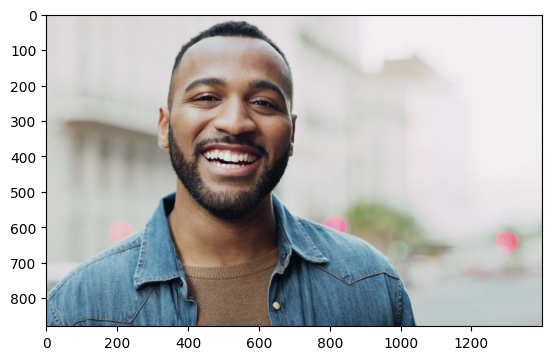


Sample sad image:


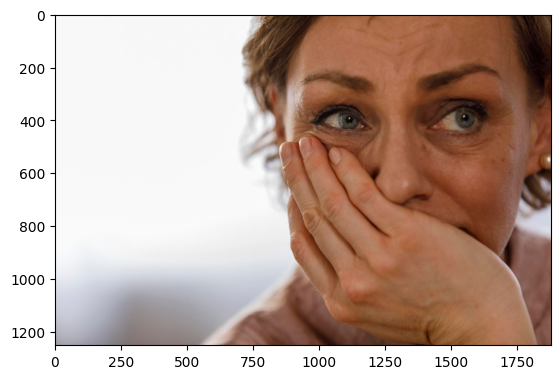

In [3]:
from tensorflow.keras.preprocessing.image import load_img

happy_dir = "C:/Users/aksha/OneDrive/Desktop/amay/data/happy"
sad_dir = "C:/Users/aksha/OneDrive/Desktop/amay/data/sad"

print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}"))
plt.show()

print("\nSample sad image:")
plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[0])}"))
plt.show()


In [4]:
from tensorflow.keras.preprocessing.image import img_to_array


sample_image  = load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}")


sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")

Each image has shape: (880, 1400, 3)
The maximum pixel value used is: 245.0


In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    r"C:/Users/aksha/OneDrive/Desktop/amay/data",       
    target_size=(150, 150),     
    batch_size=10,
    class_mode='binary'         
)

Found 171 images belonging to 2 classes.


In [7]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import RMSprop

def train_happy_sad_model(train_generator):
    model = models.Sequential([
        layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')  
    ])
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=RMSprop(learning_rate=0.001),
        metrics=['accuracy']
    )
    
    callbacks = myCallback()
    
    history = model.fit(train_generator, epochs=50, callbacks=[callbacks])
    return history,model

In [8]:
hist,model = train_happy_sad_model(train_generator)

c:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - accuracy: 0.5453 - loss: 0.9329
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - accuracy: 0.5986 - loss: 0.6578
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - accuracy: 0.6839 - loss: 0.6285
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - accuracy: 0.7058 - loss: 0.6160
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.7402 - loss: 0.4678
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - accuracy: 0.8608 - loss: 0.3474
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 0.9228 - loss: 0.2290
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - accuracy: 0.9744 - loss: 0.2073
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - accuracy: 0.9737 - loss: 0.1120
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step - accuracy: 0.9850 - loss: 0.0939
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 1.0000 - loss: 0.0291
Reached 99.9% accuracy so cancelling training!
18/18

In [9]:
print(f"Your model reached the desired accuracy after {len(hist.epoch)} epochs")

Your model reached the desired accuracy after 11 epochs


In [10]:
model.save('happy_sad_model.keras')

In [11]:
from tensorflow.keras.models import load_model
model = load_model('happy_sad_model.keras') 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted: 😀 Happy Face


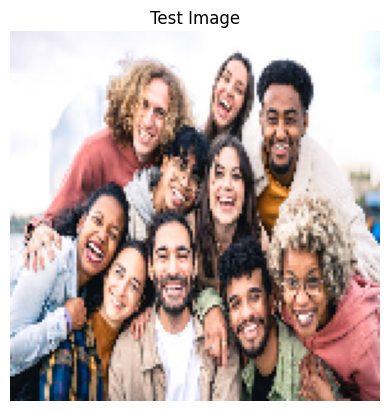

In [15]:

# Get image path or URL from user
image_input = input("Enter the image URL or local file path: ")

# Handle URL or local path
if image_input.startswith("http://") or image_input.startswith("https://"):
    response = requests.get(image_input)
    img = Image.open(BytesIO(response.content))
    
    # Save a temporary image file so load_img can use it
    temp_path = "temp_input.jpg"
    img.save(temp_path)
    img_path = temp_path
else:
    if os.path.exists(image_input):
        img_path = image_input
    else:
        raise FileNotFoundError("The local file path is invalid.Or remove the double quotes from the path")

# Load and preprocess the image
img = load_img(img_path, target_size=(150, 150))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict using the loaded model
prediction = model.predict(img_array)

# Print result
if prediction[0] > 0.5:
    print("Predicted: 😢 Sad Face")
else:
    print("Predicted: 😀 Happy Face")

# Show the image
plt.imshow(img)
plt.title("Test Image")
plt.axis('off')
plt.show()
